Hola **Audrey**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
Muchas gracias por la revsion! ya puse los cambios 
</div>

Descripción del proyecto

Contexto
Eres analista en una gran tienda online. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos.

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

# Parte 1

El archivo hypotheses_us.csv contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda online con: 

*Reach
*Impact
*Confidence
*Effort 

especificados para cada una.

In [1]:
# Comenzamos importando nuestras librerias

import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import scipy.stats as stats
from matplotlib import pyplot as plt

# Aplicamos la funcion de antes para lectura exploratoria de datos

def EDA (data):
    display(data.head())
    print()
    print()
    display(data.describe())
    print()
    print()
    display(data.info())
    print()
    print()
    print('Number of duplicates:')
    display(data.duplicated().sum())
    print()
    print()
    print('Number of N/A')
    print(data.isna().sum())


hypotheses_us = pd.read_csv('/datasets/hypotheses_us.csv',sep=(';'))
EDA(hypotheses_us)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


,Reach,Impact,Confidence,Effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None



Number of duplicates:


0



Number of N/A
Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64


In [2]:
# Movemos esta seccion acorde a los comentarios de revisor

# Carga y analisis nuestros datasets

orders= pd.read_csv('/datasets/orders_us.csv')
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

visits= pd.read_csv('/datasets/visits_us.csv')
visits['date'] = pd.to_datetime(visits['date'],format='%Y-%m-%d')

print('Resume of Orders:')
EDA(orders)
print()
print('Resume of Visits:')
EDA(visits)

Resume of Orders:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


None



Number of duplicates:


0



Number of N/A
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Resume of Visits:


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None



Number of duplicates:


0



Number of N/A
date      0
group     0
visits    0
dtype: int64


Recuerda que el índice ICE se calcula para cada hipótesis para ayudarlas a clasificar y decidir cuál tiene más prioridad en función de su impacto, confianza y esfuerzo, la formula es ice= impact * confidence / effort

Y RICE se utiliza para priorizar hipótesis, proyectos o tareas de manera similar al índice ICE, pero con una diferencia clave: incorpora una métrica adicional llamada Reach (alcance), la  formula es RICE = Reach * Impact * Confience / Effort

Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

In [3]:
# Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

# ICE
hypotheses_us['ICE'] = (hypotheses_us['Impact'] * hypotheses_us['Confidence']) / hypotheses_us['Effort']
hypotheses_us['ICE'] = (hypotheses_us['ICE'] * 10 / hypotheses_us['ICE'].max()).round(2)

hypotheses_us.head()

,Hypothesis,Reach,Impact,Confidence,Effort,ICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,8.23
1,Launch your own delivery service. This will sh...,2,5,4,10,1.23
2,Add product recommendation blocks to the store...,8,3,7,3,4.32
3,Change the category structure. This will incre...,8,3,3,8,0.69
4,Change the background color on the main page. ...,3,1,1,1,0.62


In [4]:
# RICE 

hypotheses_us['RICE'] = (hypotheses_us['Reach'] * hypotheses_us ['Impact'] * hypotheses_us ['Confidence']) / hypotheses_us['Effort']
hypotheses_us['RICE'] = (hypotheses_us['RICE']*10 / hypotheses_us['RICE'].max()).round(2)


display(hypotheses_us.sort_values(by=['RICE'], ascending=[False]))

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,6.91,10.00
2,Add product recommendation blocks to the store...,8,3,7,3,4.32,5.00
0,Add two new channels for attracting traffic. T...,3,10,8,6,8.23,3.57
6,Show banners with current offers and sales on ...,5,3,8,3,4.94,3.57
8,Launch a promotion that gives users discounts ...,1,9,9,5,10.00,1.45
3,Change the category structure. This will incre...,8,3,3,8,0.69,0.80
1,Launch your own delivery service. This will sh...,2,5,4,10,1.23,0.36
5,Add a customer review page. This will increase...,3,2,2,3,0.82,0.36
4,Change the background color on the main page. ...,3,1,1,1,0.62,0.27


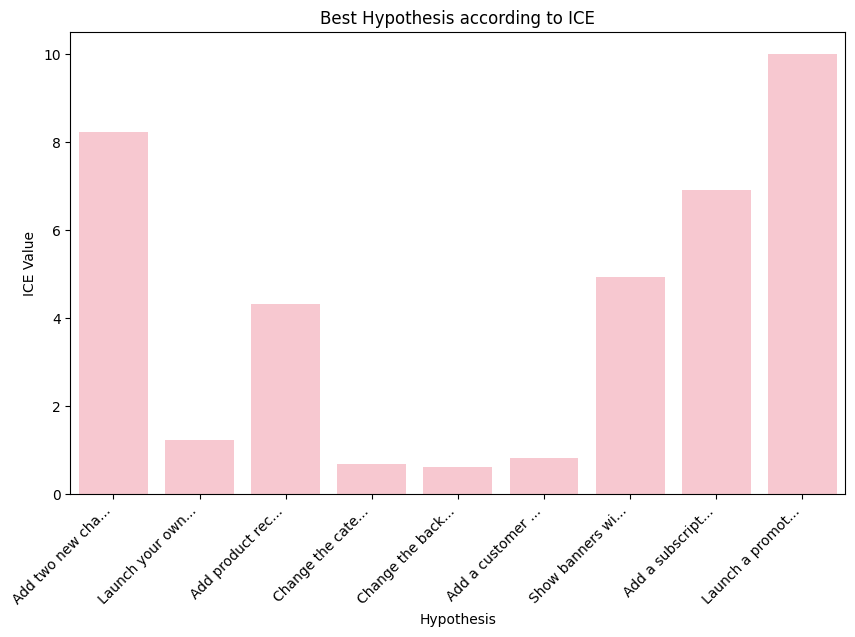

In [5]:
# Grafiquemos para hacer mucho mas visual
# vamos a recortar el nombre de las hipotesis porque estan muy largas (codigo con ayuda forum)
hypotheses_us['Hypothesis'] = hypotheses_us['Hypothesis'].apply(lambda x: x[:15] + '...' if len(x) > 15 else x)

plt.figure(figsize=(10, 6))  # Ajustamos el tamaño de la figura
sns.barplot(x='Hypothesis', y='ICE', data=hypotheses_us, color='pink')
plt.title('Best Hypothesis according to ICE')
plt.xlabel('Hypothesis')
plt.ylabel('ICE Value')
plt.xticks(rotation=45, ha='right')  # Rotamos las etiquetas del eje x para mayor legibilidad

plt.show()



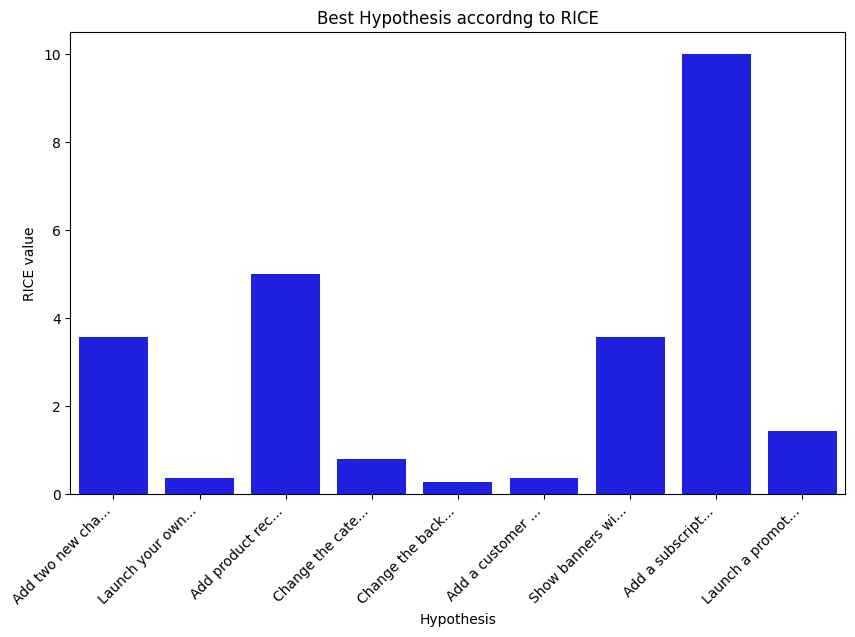

In [6]:
# Graficamos ahora RICE 
plt.figure(figsize=(10, 6))
sns.barplot(x='Hypothesis',y='RICE',data=hypotheses_us,color='blue')
plt.title('Best Hypothesis accordng to RICE')
plt.xlabel('Hypothesis')
plt.ylabel('RICE value')
plt.xticks(rotation=45, ha='right')


plt.show()

Valor Alto en ICE/RICE: Si una hipótesis tiene un valor alto de ICE o RICE, significa que tiene un gran impacto con una alta confianza y requiere menos esfuerzo para implementarse, lo que la hace prioritaria.

Valor Bajo en ICE/RICE: Si una hipótesis tiene un valor bajo de ICE o RICE, significa que o bien tiene un bajo impacto, baja confianza o requiere más esfuerzo. Estas hipótesis serán menos prioritarias.

podemos dar conclusiones mas adelante conforme avancemos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien! El cálculo es correcto y con las gráficas es mucho más sencillo poder realizar la comparación entre los dos frameworks
</div>

# Parte 2. Análisis del test A/B

Realizaste una prueba A/B y obtuviste los resultados descritos en los archivos orders_us.csv y visits_us.csv.

Ejercicio

Analiza el test A/B:

Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.
Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.
Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.
Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.
Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.
Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.
Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.
Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.
Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Para mantener un mejor orden, siempre realiza la carga de datos al inicio y la exploración inicial en una sóla sección después de cargar los datos
</div>

In [7]:
# Comenzaremos a hacer pivot tables para ambos datasets

orders_pivot = orders.pivot_table(index=['date','group'],
                                  values=['transactionId','visitorId','revenue'],
                                  aggfunc= {'transactionId':pd.Series.nunique, 'visitorId':pd.Series.nunique,'revenue':'sum'}).reset_index().sort_values(by=['date','group'])

visits_pivot =  visits.pivot_table(index='date',
                                   columns='group',
                                   values='visits',
                                   aggfunc='sum').fillna(0).reset_index()

#visits_pivot.columns = ['date', 'A_visits', 'B_visits']
visits_pivot = visits_pivot.melt(id_vars='date', value_vars=['A', 'B'], var_name='group', value_name='visits')
print(orders_pivot)
visits_pivot

         date group  revenue  transactionId  visitorId
0  2019-08-01     A   2356.8             24         20
1  2019-08-01     B   1620.0             21         20
2  2019-08-02     A   1503.5             20         19
3  2019-08-02     B   2623.8             24         23
4  2019-08-03     A   1815.2             24         24
..        ...   ...      ...            ...        ...
57 2019-08-29     B   3623.7             20         20
58 2019-08-30     A   1364.3             11         10
59 2019-08-30     B   3393.3             24         24
60 2019-08-31     A    991.4             12         12
61 2019-08-31     B   2104.3             20         20

[62 rows x 5 columns]


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [8]:
#  fusionemos ambas tablas

merged_data = orders_pivot.merge(visits_pivot, left_on=['date', 'group'], right_on=['date', 'group'])
merged_data.columns = ['date', 'group','orders', 'buyers', 'revenue', 'visitors']

merged_data['ave_ord_size'] = merged_data['revenue'] / merged_data['orders'] #calculamos el tamaño promedio de las ordenes

display(merged_data)

,date,group,orders,buyers,revenue,visitors,ave_ord_size
0,2019-08-01,A,2356.8,24,20,719,0.008486
1,2019-08-01,B,1620.0,21,20,713,0.012346
2,2019-08-02,A,1503.5,20,19,619,0.012637
3,2019-08-02,B,2623.8,24,23,581,0.008766
4,2019-08-03,A,1815.2,24,24,507,0.013222
...,...,...,...,...,...,...,...
57,2019-08-29,B,3623.7,20,20,531,0.005519
58,2019-08-30,A,1364.3,11,10,490,0.007330
59,2019-08-30,B,3393.3,24,24,490,0.007073
60,2019-08-31,A,991.4,12,12,699,0.012104


# Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas

print('Revenue by group')
sns.lineplot(x='date',y='revenue',data=merged_data,hue='group')
plt.title('Revenue by group')
plt.xlabel('date')
plt.ylabel('revenue')
plt.xticks(rotation=45)

plt.show()

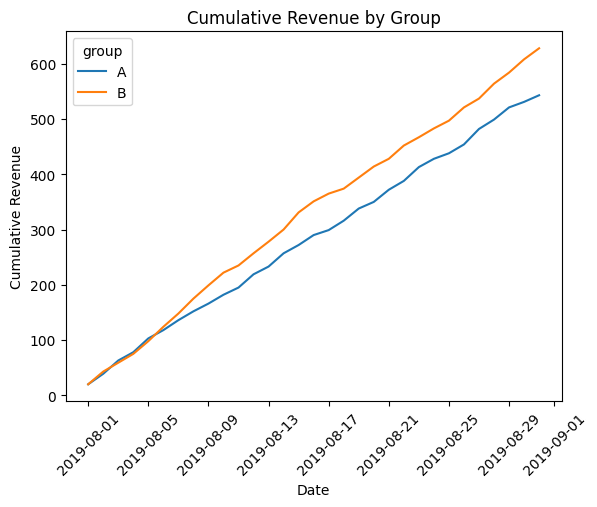

In [9]:
# Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas
# utilizamos comsum como medida del revisor 

merged_data['cumulative_revenue'] = merged_data.groupby('group')['revenue'].cumsum()

sns.lineplot(x='date', y='cumulative_revenue', data=merged_data, hue='group')
plt.title('Cumulative Revenue by group')
plt.xlabel('Date')
plt.ylabel('Cumulative Revenue')
plt.xticks(rotation=45)
plt.show()

#El grupo B genero consistentemente mas ingresos acumulados que el grupo A a lo largo del tiempo. La brecha entre ambos grupos se amplia progresivamenteindicando un mejor rendimiento del grupo B.


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Esto no presenta el gráfico acumulado, est presenta sólo el total de revenue por cada día. Te sugiero revisar `cumsum()` para estos gráficos   
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Así está mucho mejor
</div>

Average size of orders by group 


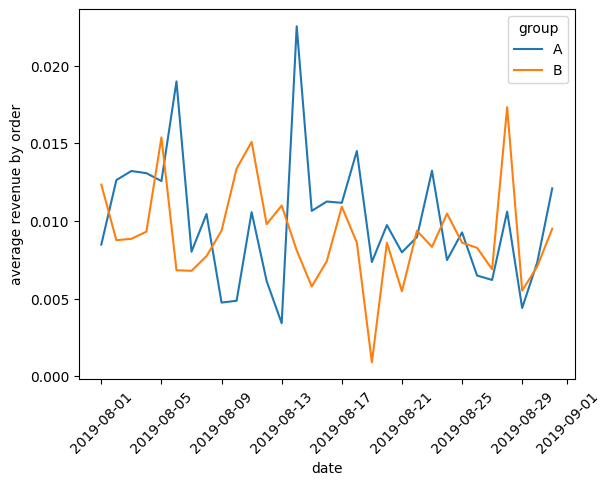

In [10]:
# Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.
print('Average size of orders by group ')

sns.lineplot(x='date',y='ave_ord_size',data=merged_data,hue='group')
plt.xlabel('date')
plt.ylabel('average revenue by order')
plt.xticks(rotation=45)
plt.show()

# Podemos ver un average revenue by order mucho mayor en el grupo B 

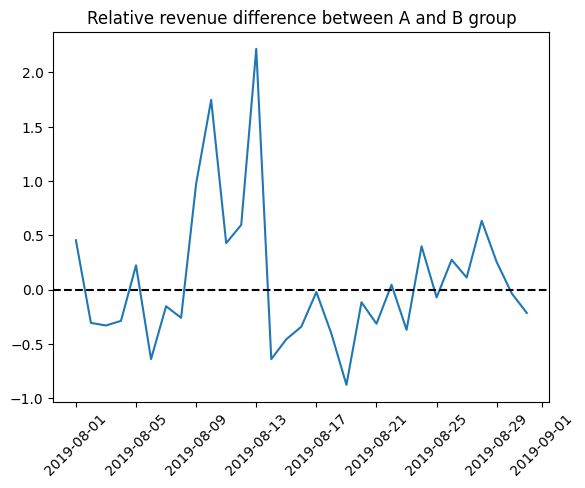

In [11]:
# Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas

merged_a = merged_data[merged_data['group'] == 'A']
merged_b = merged_data[merged_data['group'] == 'B']

merged_revenue = merged_a.merge(merged_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Graficamos
plt.plot(merged_revenue['date'], (merged_revenue['revenueB']/merged_revenue['ordersB'])/(merged_revenue['revenueA']/merged_revenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') # linea puntiaguda
plt.xticks(rotation=45)
plt.title('Relative revenue difference between A and B group')
plt.show()

Que podemos observar? Mayor ventaja para el grupo A en ciertos momentos: Alrededor del 9 y 13 de agosto, la diferencia es positiva y alta, lo que sugiere que el grupo A tuvo un mejor rendimiento en términos de ingresos en esos días.

pero después del 13 de agosto se observa una caída pronunciada justo desps del pico, lo que podría indicar un evento o cambio que afectó el rendimiento del grupo A en comparacion con B.

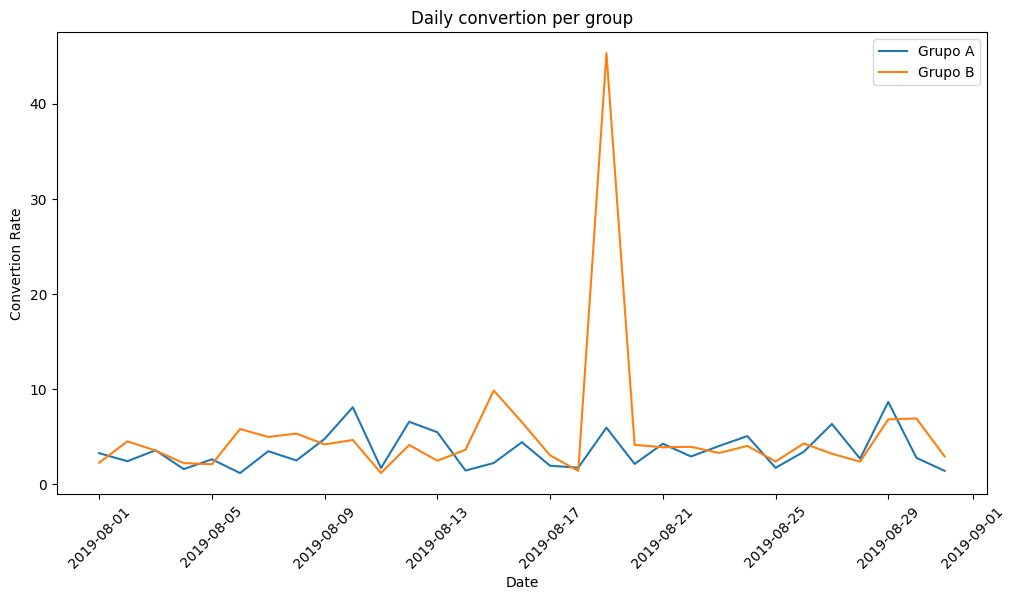

difference between conversion rate for A and B group:
1.7727220481154733
El grupo B tiene un rendimiento superior en terminos de conversion.


In [12]:
# Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

# Calcula la tasa de conversión diaria para cada grupo
merged_data['conversion'] = merged_data['orders'] / merged_data['visitors']

# Filtra los datos por grupo
conversion_a = merged_data[merged_data['group'] == 'A'][['date', 'conversion']]
conversion_b = merged_data[merged_data['group'] == 'B'][['date', 'conversion']]

# Grafica
plt.figure(figsize=(12, 6))
sns.lineplot(data=conversion_a, x='date', y='conversion', label='Grupo A')
sns.lineplot(data=conversion_b, x='date', y='conversion', label='Grupo B')
plt.xticks(rotation=45)
plt.title('Daily convertion per group')
plt.xlabel('Date')
plt.ylabel('Convertion Rate')
plt.legend()
plt.show()

diferencia = conversion_b['conversion'].mean() - conversion_a['conversion'].mean()
print('difference between conversion rate for A and B group:')
print(diferencia)
print('El grupo B tiene un rendimiento superior en terminos de conversion.')

# conclusion en la mayoria del periodo ambos grupos muestran variabilidad sin una diferencia extrema pero el grupo B sigue liderandocon una taza de conversion alta 

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hace falta redactar tus conclusiones y conjeturas de lo que se muestra en el gráfico y el resultado obtenido
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Procura redactar las interpretaciones de cada gráfica, no sólo una
</div>

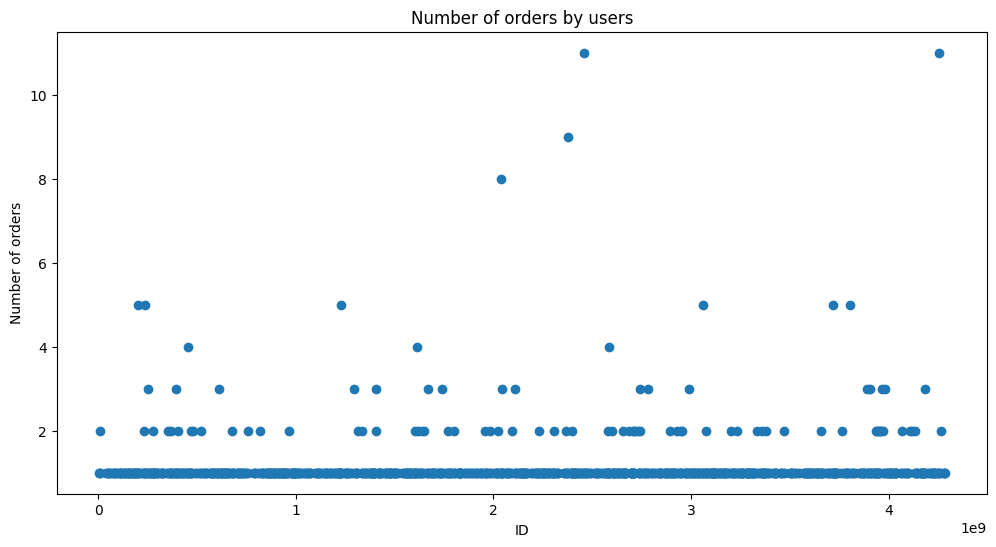

In [13]:
# Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

# Calcula el número de pedidos por usuario
orders_user = orders.groupby('visitorId').agg({'transactionId': 'nunique'}).reset_index()
orders_user.columns = ['visitorId', 'orders']

plt.figure(figsize=(12, 6))
plt.scatter(orders_user['visitorId'], orders_user['orders'])
plt.title('Number of orders by users')
plt.xlabel('ID')
plt.ylabel('Number of orders')
plt.show()


# Hay algunos valores atípicos, particularmente uno que supera los 20 v000 en costo, lo que podría indicar un pedido excepcionalmente grande

In [14]:
#checa ipybn num 10 ctrl f = 'percentil'
# Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.
print(np.percentile(orders_user['orders'], [90, 95, 99])) 
print('el 95% de los usuarios hacen no más de dos pedidos')

[1. 2. 4.]
el 95% de los usuarios hacen no más de dos pedidos


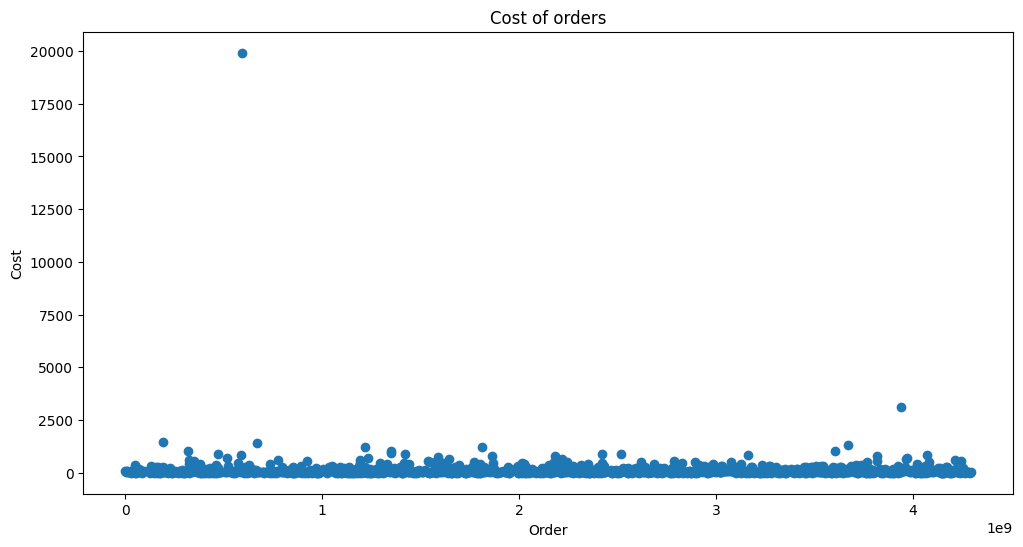

In [15]:
# Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

price_of_orders = orders.groupby('transactionId').agg({'revenue': 'max'}).reset_index()
price_of_orders.columns = ['transactionId', 'Cost']
plt.figure(figsize=(12, 6))
plt.scatter(price_of_orders['transactionId'], price_of_orders['Cost'])
plt.xlabel('Order')
plt.ylabel('Cost')
plt.title('Cost of orders')
plt.show()

# La mayoría de los usuarios han realizado solo una o dos órdenes. Hay algunos usuarios que han realizado muchas más ordenes lo que sugiere clientes frecuentes o mayor lealtad de ciertos usuarios.

In [16]:
# Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.
print(np.percentile(price_of_orders['Cost'], [90, 95, 99]))
print('el 95% de los usuarios no gasta más de $435.54')

[282.48  435.54  900.904]
el 95% de los usuarios no gasta más de $435.54


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, revisar los valores atípicos que hay en los datos ayuda a que los cálculos no se vean afectados por un valor muy alto o muy bajo en esa columna
</div>

In [17]:
print('Encuentra la significancia estadística de la diferencia en la conversión entre los grupos:')
print(format(stats.mannwhitneyu(conversion_a['conversion'], conversion_b['conversion'])[1]))


print('Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos:')
print(format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]))

Encuentra la significancia estadística de la diferencia en la conversión entre los grupos:
0.1676789684746155
Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos:
0.6915246773264736


In [18]:
# Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

more_orders = orders_user[orders_user['orders'] > 2]['visitorId'] # selecciona los de mas de 2
expensive_orders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']

abnormal_numbers = pd.concat([more_orders, expensive_orders]).drop_duplicates()
normal_numbers = orders[np.logical_not(orders['visitorId'].isin(abnormal_numbers))]

# Calcula la tasa de conversión diaria para cada grupo con los datos filtrados
daily_convertion_rate = normal_numbers.groupby(['date', 'group']).agg({
    'transactionId': 'nunique',
    'visitorId': 'nunique',
    'revenue': 'sum'
}).reset_index()

# checar aqui
final_data = daily_convertion_rate.merge(visits, on=['date', 'group'])
final_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
final_data['conversion'] = final_data['orders'] / final_data['visitors']

#filtramos en grupos
final_a = final_data[final_data['group'] == 'A'][['date', 'conversion']]
final_b = final_data[final_data['group'] == 'B'][['date', 'conversion']]

print('significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados:')
print(stats.mannwhitneyu(final_a['conversion'], final_b['conversion'])[1])

significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados:
0.03470480567628018


In [19]:
# Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
orders_size = orders[orders['revenue'] <
                    np.percentile(price_of_orders['Cost'],95)]

print('Significancia de la diferencia del tamaño promedio de pedido entre los grupos:')
print(stats.mannwhitneyu(orders_size[orders_size['group'] == 'A']['revenue'], orders_size[orders_size['group'] == 'B']['revenue'])[1])

Significancia de la diferencia del tamaño promedio de pedido entre los grupos:
0.8092414994580307


In [20]:
# Final step: 
# Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 
# Parar la prueba, considerar a uno de los grupos como líder.
# Parar la prueba, concluir que no hay diferencia entre los grupos 
# Continuar la prueba


# Filtra los datos por grupo
revenue_a = orders[orders['group'] == 'A']['revenue']
revenue_b = orders[orders['group'] == 'B']['revenue']

# Calcula el porcentaje de datos en revenue mayor a 435.54 para cada grupo
percentage_a = (revenue_a > 435.54).mean() * 100
percentage_b = (revenue_b > 435.54).mean() * 100

print(f"Percentage for A group: {percentage_a:.2f}%")
print(f"Percentage for B group: {percentage_b:.2f}%")

Percentage for A group: 4.67%
Percentage for B group: 5.31%


# Conlcusiones

Después de analizar los datos, se observa que el porcentaje de ingresos mayores a 435.54 es ligeramente superior en el grupo B (5.31%) en comparación con el grupo A (4.67%). Aunque esta diferencia es pequeña, podría indicar una ligera ventaja de la estrategia publicitaria B en generar compras de mayor valor.


Dado que la conversión en el grupo B ha mostrado un mejor desempeño, se sugiere explorar estrategias complementarias que puedan potenciar tanto el volumen de compras como el ingreso generado por usuario. Esto permitiría optimizar el impacto económico de la estrategia publicitaria seleccionada :)

<div class="alert alert-block alert-danger">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Tienes un buen avance, sólo hay un par de puntos que necesitan unos cambios para que el proyecto esté completo. Por otro lado, podrías ser un poco más detallado en las conclusiones ya que estas deben resaltar los hallazgos a lo largo del notebook. Saludos!
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Bu
</div>